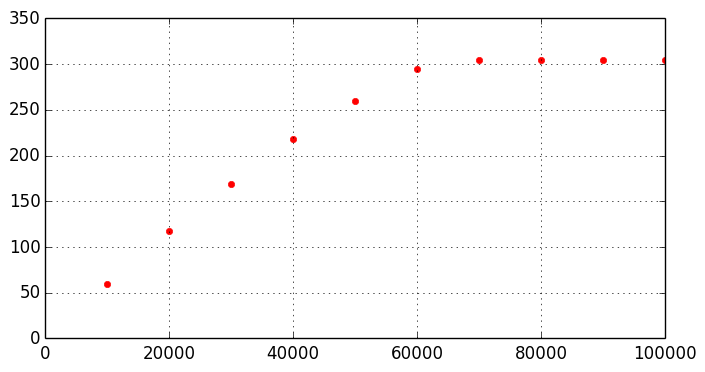

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Cash to spend: 10000 Max points: 60.0
Cash to spend: 20000 Max points: 118.0
Cash to spend: 30000 Max points: 169.0
Cash to spend: 40000 Max points: 218.0
Cash to spend: 50000 Max points: 260.0
Cash to spend: 60000 Max points: 295.0
Cash to spend: 70000 Max points: 305.0
Cash to spend: 80000 Max points: 305.0
Cash to spend: 90000 Max points: 305.0
Cash to spend: 100000 Max points: 305.0


In [80]:
# 3 = Name
# 5 = Roster Position
# 6 = Salary
# 9 = Expected Points
#pg sg sf pf c g uftil
using JuMP, Gurobi,PyPlot
result = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
cap = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]


for z in 1:10

    playerList = readcsv("DKsalaries2.csv")

    numPlayers = trunc(Int,(length(playerList)/9))
    m = Model(solver=GurobiSolver(OutputFlag=0))

    @variable(m, players[2:numPlayers], Bin)
    @variable(m, pg[2:numPlayers], Bin)
    @variable(m, sg[2:numPlayers], Bin)
    @variable(m, sf[2:numPlayers], Bin)
    @variable(m, pf[2:numPlayers], Bin)
    @variable(m, c[2:numPlayers], Bin)
    @variable(m, f[2:numPlayers], Bin)
    @variable(m, g[2:numPlayers], Bin)
    @variable(m, util[2:numPlayers], Bin)

    @constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)

        for i in 2:numPlayers
            if contains(playerList[i,5],"PG")
                @constraint(m,pg[i] <= 1)
            else
                @constraint(m,pg[i] == 0)
            end
            if contains(playerList[i,5],"SG")
                @constraint(m,sg[i] <= 1)
            else
               @constraint(m,sg[i] == 0)
            end
            if contains(playerList[i,5],"SF")
                @constraint(m,sf[i] <= 1)
            else
                @constraint(m,sf[i] == 0)
            end
            if contains(playerList[i,5],"PF")
                @constraint(m,pf[i] <= 1)
            else
                @constraint(m,pf[i] == 0)
            end
             if contains(playerList[i,5],"C")
                @constraint(m,c[i] <= 1)
            else
                @constraint(m,c[i] == 0)
            end       
            if contains(playerList[i,5],"G")
                @constraint(m,g[i] <= 1)
            else
                @constraint(m,g[i] == 0)
            end
            if contains(playerList[i,5],"F")
                @constraint(m,f[i] <= 1)
            else
                @constraint(m,f[i] == 0)
            end
            if contains(playerList[i,5],"UTIL")
                @constraint(m,util[i] <= 1)
            else
                @constraint(m,util[i] == 0)
            end

        end  

        @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= cap[z])

        for i in 2:numPlayers
            @constraint(m, pg[i] + sg[i] + sf[i] + pf[i] + c[i] + f[i] + util[i] - players[i] == 0)
        end

        @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )



        @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:92))

    #    @constraint(m, players[i])

            solve(m);
           val = getobjectivevalue(m)
            result[z]= trunc(Int,val)
end

  
    for i in 1:10
        println("Cash to spend: ",cap[i]," Max points: ", result[i])
    end
 
#k=10
#npts = 100
#xfine = linspace(0,10000,npts)
#ffine = ones(npts)
#for j = 1:k
#    ffine = [ffine.*xfine ones(npts)]
#end
#yfine = ffine * result
figure(figsize=(8,4))
plot(cap,result,"r.", markersize=10)
#plot( xfine, yfine, "b-")
axis([0,100000,0,350])
grid("on")


